In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [125]:
data =pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [126]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [127]:
data.shape

(181691, 135)

In [128]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [129]:
data.rename(columns={'iyear':'year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'region_txt':'Region','provstate':'State','city':'City',
                     'latitude':'Latitude','longitude':'Longitude','gname':'Group','summary':'Summary','attacktype1_txt':'Attacktype',
                     'targtype1_txt':'Targettype','targsubtype1_txt':'Targetsubtype','weaptype1_txt':'Weapon',
                     'nkill':'kill','nwound':'Wound'},inplace=True)

In [130]:
df= data[[ 'year','Month','Day','Country','State','City','Region','Latitude','Longitude','Attacktype',
          'Targettype','Targetsubtype','kill', 'Wound','Summary','Group','Weapon','motive']]

In [131]:
df.head(10)

,year,Month,Day,Country,State,City,Region,Latitude,Longitude,Attacktype,Targettype,Targetsubtype,kill,Wound,Summary,Group,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,1.0,0.0,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,Unknown,Incendiary,NaN
5,1970,1,1,United States,Illinois,Cairo,North America,37.005105,-89.176269,Armed Assault,Police,"Police Building (headquarters, station, school)",0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,Montevideo,Montevideo,South America,-34.891151,-56.187214,Assassination,Police,Police Security Forces/Officers,0.0,0.0,NaN,Tupamaros (Uruguay),Firearms,NaN
7,1970,1,2,United States,California,Oakland,North America,37.791927,-122.225906,Bombing/Explosion,Utilities,Electricity,0.0,0.0,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Explosives,NaN
8,1970,1,2,United States,Wisconsin,Madison,North America,43.076592,-89.412488,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,Wisconsin,Madison,North America,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Incendiary,To protest the War in Vietnam and the draft


In [132]:
df.isnull().sum()

year                  0
Month                 0
Day                   0
Country               0
State               421
City                434
Region                0
Latitude           4556
Longitude          4557
Attacktype            0
Targettype            0
Targetsubtype     10373
kill              10313
Wound             16311
Summary           66129
Group                 0
Weapon                0
motive           131130
dtype: int64

In [133]:
df['City']=df['City'].fillna(0)
df['State']=df['State'].fillna(0)
df['Latitude']=df['Latitude'].fillna(0)
df['Longitude']=df['Longitude'].fillna(0)
df['Targetsubtype']=df['Targetsubtype'].fillna(0)
df['kill']=df['kill'].fillna(0)
df['Wound']=df['Wound'].fillna(0)
df['Summary']=df['Summary'].fillna(0)
df['motive']=df['motive'].fillna(0)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   State          181691 non-null  object 
 5   City           181691 non-null  object 
 6   Region         181691 non-null  object 
 7   Latitude       181691 non-null  float64
 8   Longitude      181691 non-null  float64
 9   Attacktype     181691 non-null  object 
 10  Targettype     181691 non-null  object 
 11  Targetsubtype  181691 non-null  object 
 12  kill           181691 non-null  float64
 13  Wound          181691 non-null  float64
 14  Summary        181691 non-null  object 
 15  Group          181691 non-null  object 
 16  Weapon         181691 non-null  object 
 17  motive         181691 non-nul

In [135]:
#@title Data Visulaization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6840510b10>,
      dtype=object)

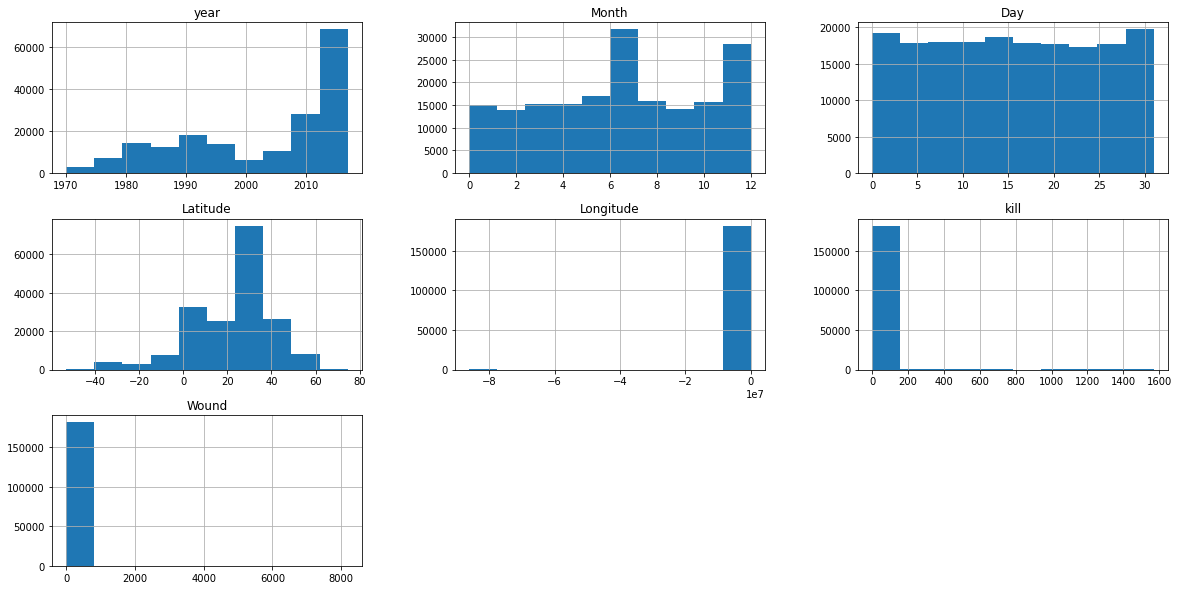

In [136]:
df.hist(figsize=(20,10))

In [137]:
#@title showing working of histogram

In [138]:
d=[1,2,3,4,5,6,7,8,7]
p=[1,2,3,4,5,6,7,8,8]

In [139]:
df2=pd.DataFrame(list(zip(d,p)),columns=['fruits','age'])

In [140]:
df2

,fruits,age
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,7,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68401a6150>,
      dtype=object)

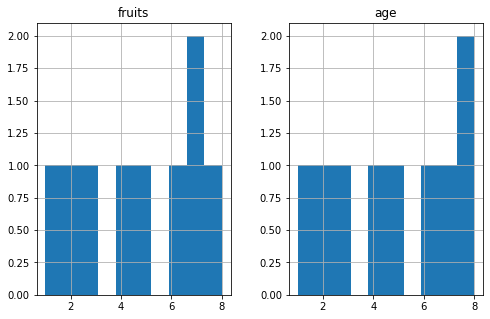

In [141]:
df2.hist(figsize=(8,5))

In [142]:
cor2=df2.corr()
cor2

,fruits,age
fruits,1.000000,0.992551
age,0.992551,1.000000


**Corelation** **matrix**

In [143]:
cor=df.corr()
cor

,year,Month,Day,Latitude,Longitude,kill,Wound
year,1.000000,0.000139,0.018254,0.186348,0.003807,0.021252,0.017484
Month,0.000139,1.000000,0.005497,-0.014956,-0.003832,0.004031,0.003178
Day,0.018254,0.005497,1.000000,0.005018,-0.002257,-0.003225,-0.001082
Latitude,0.186348,-0.014956,0.005018,1.000000,0.001365,-0.016579,0.016645
Longitude,0.003807,-0.003832,-0.002257,0.001365,1.000000,-0.000570,0.000203
kill,0.021252,0.004031,-0.003225,-0.016579,-0.000570,1.000000,0.443326
Wound,0.017484,0.003178,-0.001082,0.016645,0.000203,0.443326,1.000000


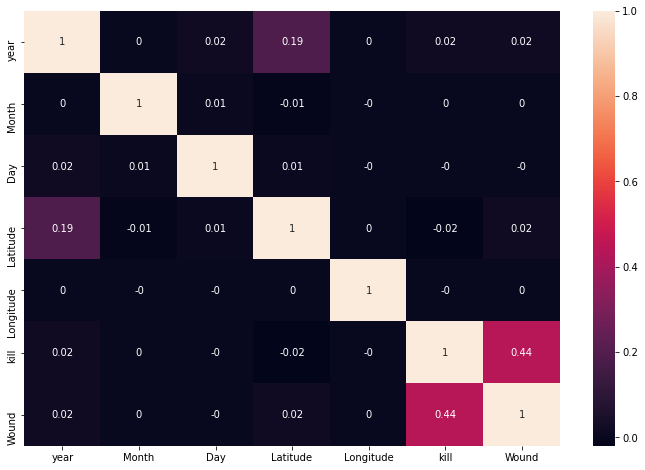

In [144]:
plt.figure(figsize=(12,8))
sns.heatmap(np.round(cor,2),annot=True)

In [ ]:
#@title YEAR, MONTH, DATEWISE MOST TERRORIST ACTIVITIES

Text(0.5, 1.0, 'Number of Terrorist Activities Each Year')

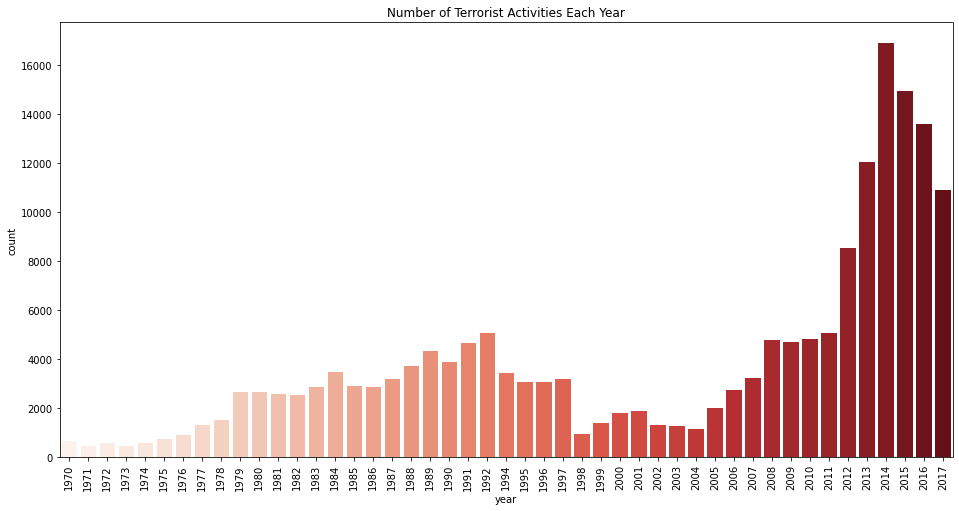

In [145]:
plt.subplots(figsize=(16,8))
sns.countplot('year',data=df,palette='Reds')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')

In [146]:
mo=(df['Month'].value_counts()/len(df['Month'])*100).reset_index().sort_values('Month',ascending=False)
mo

,index,Month
0,5,9.287747
1,7,8.953663
2,8,8.696083
3,10,8.565642
4,6,8.453363
5,3,8.397224
6,4,8.339433
7,1,8.220550
8,11,8.204039
9,9,7.804459


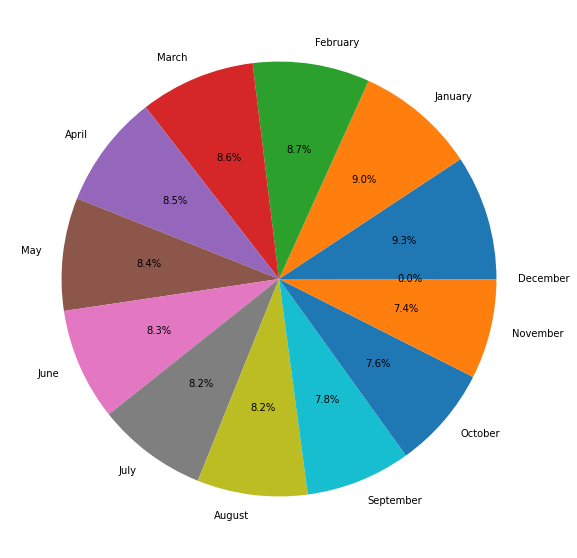

In [147]:
plt.figure(figsize=(10,10))
labels=('','January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December')
plt.pie(mo['Month'],labels=labels,autopct='%1.1f%%')
plt.show()

**Most attack in jan, Least in Dec**

In [148]:
#@title Day wise

In [149]:
dy=(df['Day'].value_counts()/len(df['Day'])*100).reset_index().sort_values('Day',ascending=False)
dy

,index,Day
0,15,3.577502
1,1,3.491642
2,4,3.386519
3,16,3.363953
4,10,3.337535
5,9,3.333682
6,13,3.325977
7,14,3.317721
8,28,3.317170
9,12,3.308915


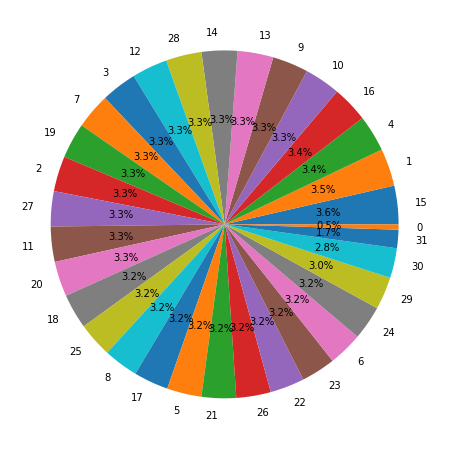

In [150]:
plt.figure(figsize=(8,8))
labels=dy['index']
plt.pie(dy['Day'],labels=labels,autopct='%1.1f%%')
plt.show()


Most of the attacks took place on 15th and least on 31st


In [ ]:
#@title Terrorist activities in countries

In [151]:
print("Countries with most Terroist Activities:\n",df['Country'].value_counts().head())

Countries with most Terroist Activities:
 Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64


In [152]:
terr=df.groupby(['Country'],as_index=False).count()
fig=px.choropleth(terr,locations='Country',locationmode='country names',color='year',hover_name='Country',
                 projection='orthographic',title='Terror Attacks(1990-2017)',scope='world',labels={'year':'Attacks'})
fig.show()

**Terrorist Acitivities in different Cities**

In [153]:
print('City with most Terroists Activities:\n',df['City'].value_counts().head())

print("\nCity with most Terroists Activities:",df['City'].value_counts().index[1])

City with most Terroists Activities:
 Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: City, dtype: int64

City with most Terroists Activities: Baghdad


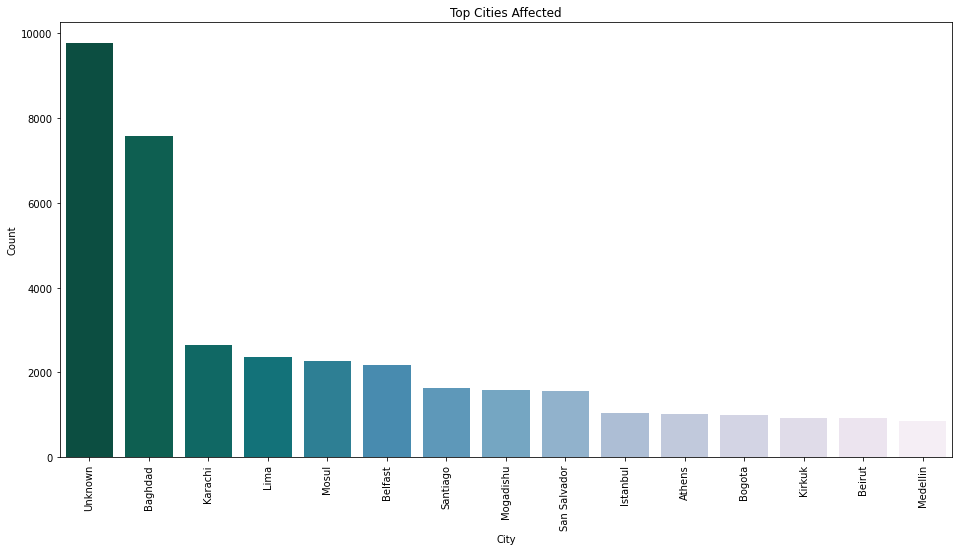

In [154]:

plt.figure(figsize=(16,8))
sns.barplot(df['City'].value_counts()[:15].index,df['City'].value_counts()[:15].values,palette='PuBuGn_r')
plt.title("Top Cities Affected")
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Total No. Of Casualities Each Year**

In [155]:

df['Wound']=df['Wound'].astype(int)
df['kill']=df['kill'].astype(int)
df['Casualties']=df['Wound']+df['kill']

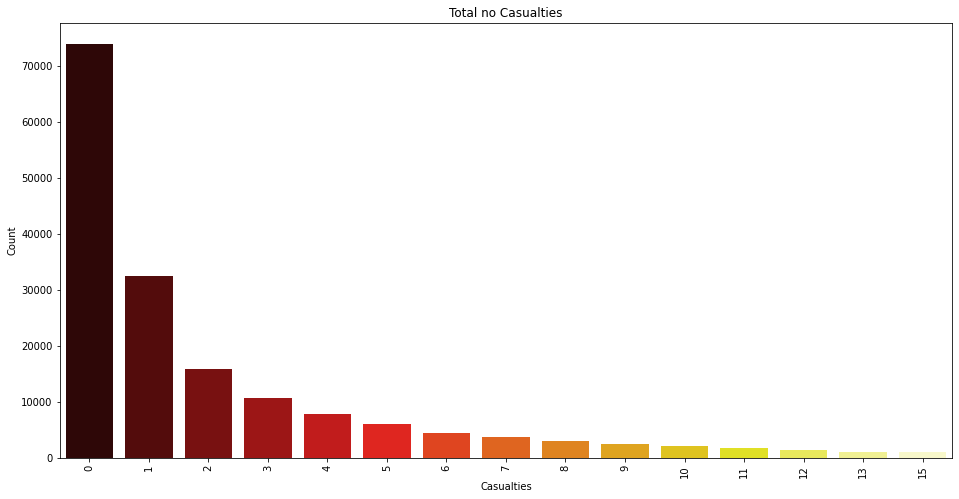

In [156]:
plt.figure(figsize=(16,8))
sns.barplot(df['Casualties'].value_counts()[:15].index,df['Casualties'].value_counts()[:15].values,palette='hot')
plt.title("Total no Casualties")
plt.xlabel('Casualties')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Most active organization behind attack

In [157]:
print('Most Active organization:\n',df['Group'].value_counts().head())

Most Active organization:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


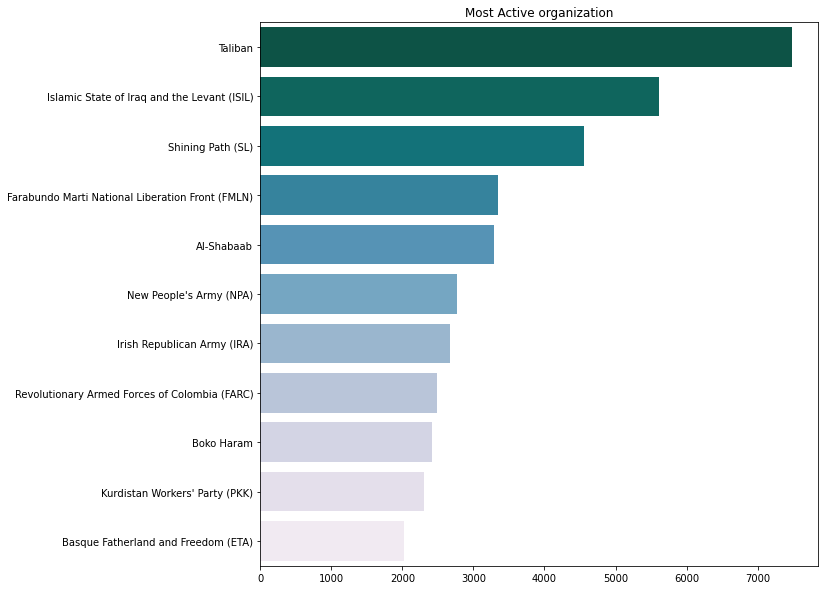

In [158]:
plt.subplots(figsize=(10,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,palette='PuBuGn_r')
plt.title("Most Active organization")
plt.show()

**Conclusions** :
1. Years with most attacks : 2014 (around 1,60,000) and 2015(around 1,50,000).
2. Months with most attacks : January
3. Date with most attacks : 15th
4. Top 5 countries with most attacks : Iraq,Pakistan,Afganistan,India and columbia.
5. Top 5 cities with most attacks : Baghdad,Karachi,Lima,Mosul and Belfast
6. Top 3 terrist groups : Taliban,Islamic State of Iraq and Shining Path (SL).